#  KING COUNTY REAL ESTATE PROJECT

###  An Analysis on King's County House Pricing Strategies Based on Home Attributes and Modifications


## 1. BUSINESS UNDERSTANDING

### 1.1 Background Information
King County real estate market is a dynamic and complex domain, influenced by various factors ranging from economic conditions to individual property characteristics. Home prices, in particular, are subject to fluctuations based on attributes such as location, size, number of bedrooms and bathrooms, condition, and additional features like waterfront views. Understanding these factors and their impact on home prices is crucial for both buyers and sellers in making informed decisions. Moreover, real estate developers and investors are interested in knowing how specific modifications, such as adding floors, affect property values to maximize returns on investment.

### 1.2 Overview
This project aims to use King County house sales dataset to analyze home prices in relation to various property attributes and modifications. By leveraging a dataset containing comprehensive details about homes, we will explore the key factors influencing home prices. Specifically, we will focus on the impact of modifications such as adding floors on property values. The analysis will employ exploratory data analysis (EDA) techniques, feature engineering, and predictive modeling to derive meaningful insights and actionable recommendations.

### 1.3 Business Problem
King County real estate stakeholders often face challenges in accurately predicting home prices and understanding the value added by property modifications. Inaccurate pricing can lead to suboptimal investment decisions, resulting in financial losses or missed opportunities. For real estate developers, knowing how much value a modification like adding floors adds to a property is essential for planning and budgeting purposes. Thus, there is a pressing need for data-driven insights that can inform pricing strategies and investment decisions.

### 1.4 Objectives
The primary objectives of this project are:

1. Analyze the Distribution of King County Home Prices: Understand the overall distribution and key trends in home prices within the dataset.
2. Explore Relationships between Property Attributes and Prices: Identify and visualize the relationships between King County home prices and key property attributes such as size, number of bedrooms and bathrooms, condition, and grade.
3. Build Predictive Models: Develop regression models to predict home prices based on property attributes and modifications.
4. Provide Data-Driven Recommendations: Offer actionable insights and recommendations for King County real estate stakeholders based on the analysis and modeling results.

By achieving these objectives, this project aims to enhance the understanding of King County home pricing dynamics and support informed decision-making in the real estate market.








# 2. Data Understanding
To achieve the objectives of this King County Real Estate Project, a comprehensive understanding of the dataset is essential. The dataset contains various attributes related to home properties, which will be analyzed to derive insights and build predictive models. Below is a detailed breakdown of the data and its attributes:

## 2.1 Data Collection
The data has been extracted from the King County House Sales dataset, which includes the kc_house_data.csv file and includes information about home prices and various characteristics of the properties.

## 2.2 Import Relevant Libraries

In [2]:
# Data Manipulation
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modelling and Evaluations
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2.3 Loading Data

In [3]:
kc_data_df = pd.read_csv('data/kc_house_data.csv') # reading our data into a pandas data frame
kc_data_df.head() # checking the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 2.4 Data Attributes
The key attributes in the dataset are as follows:
- `id`: Unique identifier for each home.
- `date`: An object (likely a string) representing dates.
- `price`: The sale price of the home.
- `bedrooms`: Number of bedrooms in the home.
- `bathrooms`: Number of bathrooms in the home.
- `sqft_living`: Square footage of the living area.
- `sqft_lot`: Square footage of the lot.
- `floors`: Number of floors in the home.
- `waterfront`: Binary indicator of whether the home has a waterfront view (1 if yes, 0 if no).
- `view`: Level of view from the property.
- `condition`: Overall condition of the home, rated on a scale from 1 to 5.
- `grade`: Design grade of the home, rated on a scale from 1 to 13.
- `sqft_above`: Square footage of the home area above the basement.
- `sqft_basement`: Square footage of the basement.
- `yr_built`: The year the home was built.
- `yr_renovated`: The year renovations were done.
- `zipcode`: Location zipcode of the property.
- `lat`: Latitude of the property location.
- `long`: Longitude of the property location.
- `sqft_living15`: Square footage of living area for the nearest 15 neighbors.
- `sqft_lot15`: Square footage of the lots for the nearest 15 neighbors.

In [6]:
#Summary statistics of the DataFrame
kc_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2.5 Data Visualization

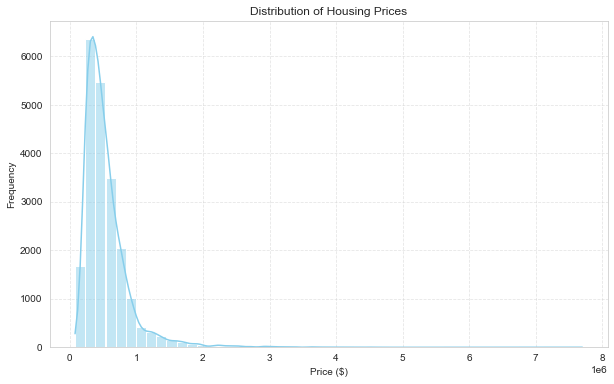

In [7]:
sns.set_style("whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of housing prices with KDE
sns.histplot(kc_data_df['price'], bins=50, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Housing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

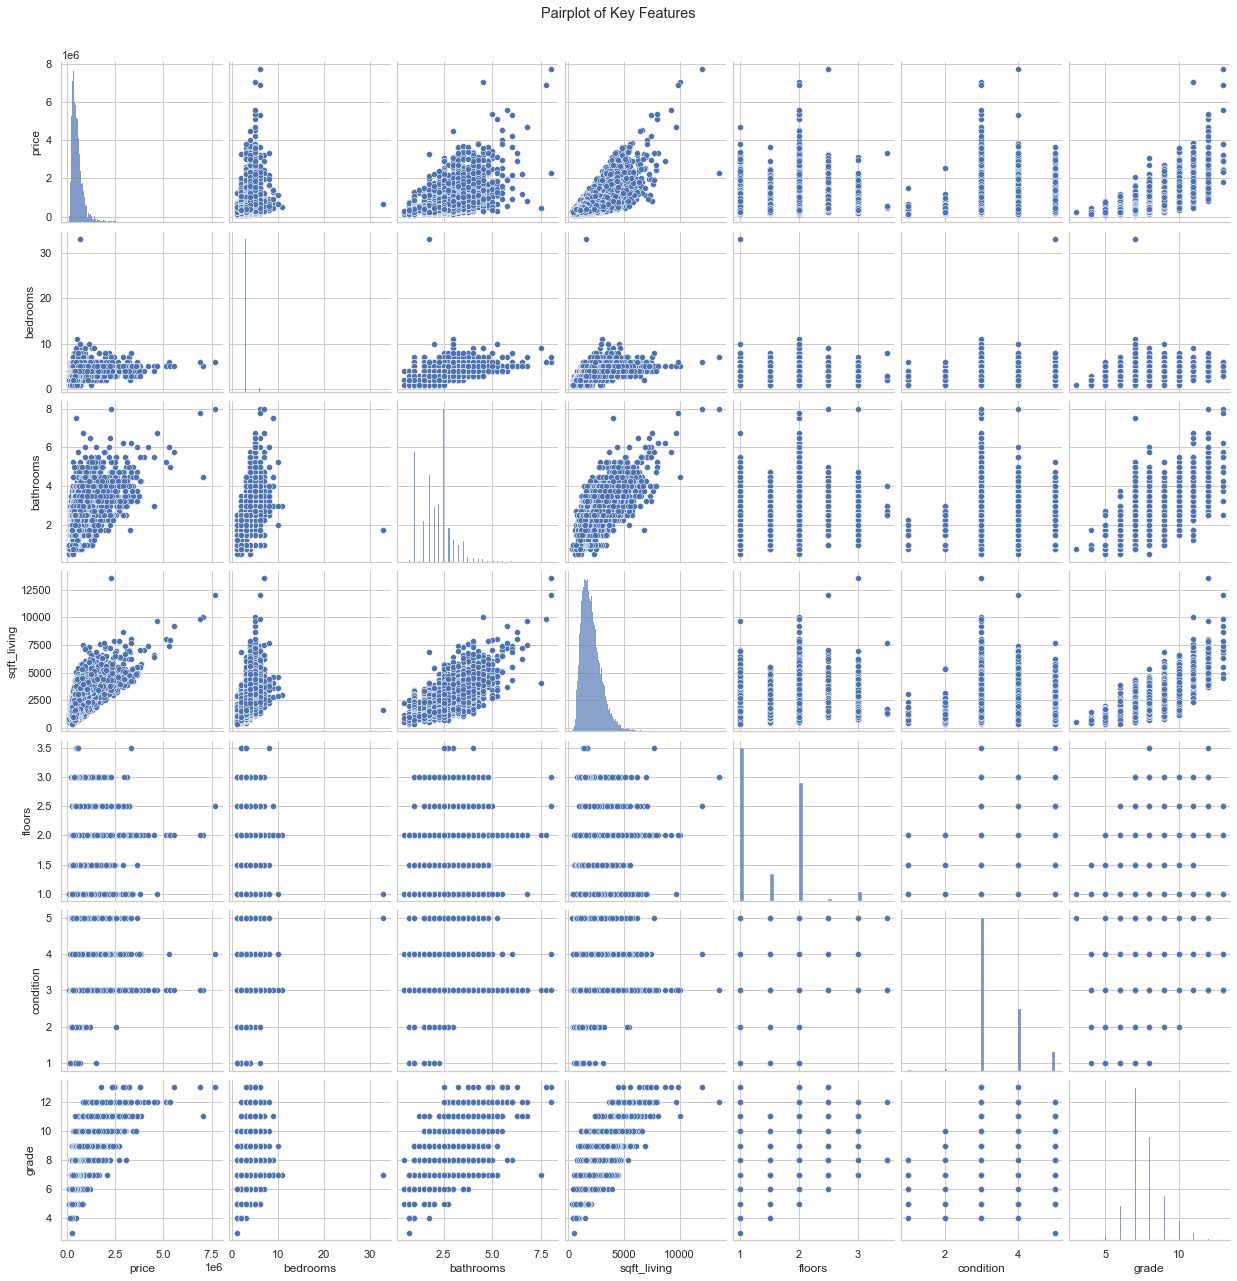

In [13]:
# Plot pairplot of key features
key_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade']
sns.pairplot(kc_data_df[key_features])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 2.6 Data Cleaning

In [9]:
# Checking for missing values in the dataset
missing_values = kc_data_df.isnull().sum()

# Display the missing values count for each column
missing_values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


# Q(7)Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## DATA UNDERSTANDING

Overview:This dataset contains information about King County House Sales with House price as the Target Variable and various features like bedrooms, bathrooms, sqft_living,condition, grade, etc as the Predictors.
Data Characteristics: Numeric variables(eg sqft_living, price number of bedrooms,number of bathrooms etc)and Categorical variables(eg condition, grade etc).

In [170]:
# Import relevant libraries
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [171]:
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [172]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [173]:
# Dispaly the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [174]:
# Display the last 5 rows of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [175]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [176]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [177]:
# Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

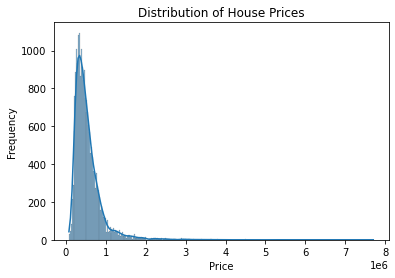

In [178]:
# Distribution of the target variables
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## DATA PREPARATION

### Dropping Features

In [179]:
# Dropping the recommended features
df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


### Data Cleaning

In [180]:
# Check for duplicates.
# df.duplicated()
#df.loc[df.duplicated()]
# Implication: No duplicates

In [181]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [182]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

# Confirm that there are no more missing values
(df.isnull().sum().sum())  

0

### Checking for Multicollinearity
Let's check the correlation matrix to identify multicollinearity among predictors.

In [183]:
# Check for multicollinearity among selected features
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
correlation_matrix = df[selected_features].corr()
correlation_matrix


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


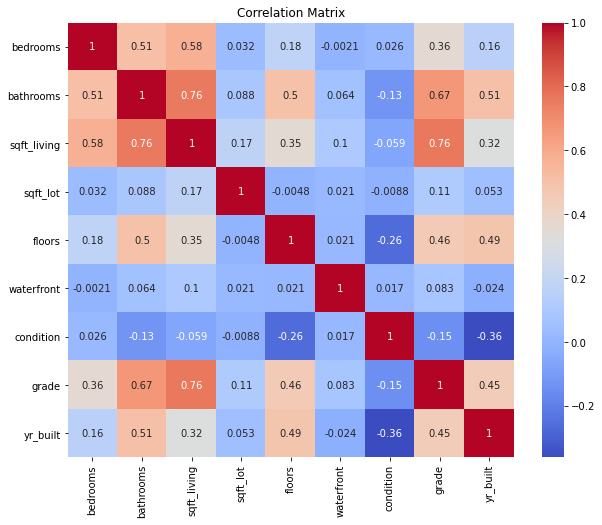

In [184]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Normalization
We will normalize numerical columns to ensure they are on a similar scale.

In [185]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be normalized
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])


### Categorical Encoding
We need to convert categorical variables (condition, grade) into numeric format using one-hot encoding.

In [186]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['condition', 'grade'])

In [187]:
# Display the first few rows of the prepared dataset
df.head()

# Confirm the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  float64
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  float64
 5   sqft_lot     21597 non-null  float64
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  float64
 8   yr_built     21597 non-null  float64
 9   condition_1  21597 non-null  uint8  
 10  condition_2  21597 non-null  uint8  
 11  condition_3  21597 non-null  uint8  
 12  condition_4  21597 non-null  uint8  
 13  condition_5  21597 non-null  uint8  
 14  grade_3      21597 non-null  uint8  
 15  grade_4      21597 non-null  uint8  
 16  grade_5      21597 non-null  uint8  
 17  grade_6      21597 non-null  uint8  
 18  grade_7      21597 non-null  uint8  
 19  grad

## Modeling
### Model Selection

In [190]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition_3', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'yr_built']
target = 'price'
# Split the data into training and testing sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initial Modeling

In [191]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
# Evaluation Metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R^2: {r2}')


Linear Regression MSE: 52567190021.46983
Linear Regression R^2: 0.5963086184331964


### Advanced Modeling

In [192]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Random Forest R^2: {r2_score(y_test, y_pred)}')


NameError: name 'RandomForestRegressor' is not defined